In [1]:
import sys
import numpy #for computation and arrays
import matplotlib #for plotting
import pandas #to handle data sets
import sklearn #for machine learning packages

# Print version of each package
print('Python: {}'.format(sys.version))
print('numpy: {}'.format(numpy.__version__))
print('matplotlib: {}'.format(matplotlib.__version__))
print('pandas: {}'.format(pandas.__version__))
print('sklearn: {}'.format(sklearn.__version__))


Python: 3.7.4 (default, Aug  9 2019, 18:34:13) [MSC v.1915 64 bit (AMD64)]
numpy: 1.16.5
matplotlib: 3.1.1
pandas: 0.25.1
sklearn: 0.21.3


In [2]:
import numpy as np
# from sklearn import preprocessing, cross_validation
from sklearn import preprocessing
from sklearn.model_selection import cross_validate #difference from course
from sklearn.neighbors import KNeighborsClassifier #K Nearest Neighbor algorithm
from sklearn.svm import SVC #Support Vector Machine
from sklearn import model_selection
from sklearn.metrics import classification_report, accuracy_score
from pandas.plotting import scatter_matrix #for data visualizations
import matplotlib.pyplot as plt
import pandas as pd


In [3]:
#Loading the dataset
#Source = UCI repository, breast cancer, wisconsin
#Column headers found from file, breast-cancer-wisconsin.names
#   at https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data"
names = ['id', 'clump_thickness', 'uniform_cell_size', 'uniform_cell_shape', 'marginal-adhesion', 'single_epithelial_cell_size', 'bare_nuclei', 'bland_chromatin', 'normal_nucleoli', 'mitosis', 'class']
df = pd.read_csv(url, names=names) #import the data

In [4]:
#*****************
#Preprocess the data
#*****************
# wherever there is a missing value in the data, insert a -99999
# to tell Python to ignore that data
df.replace('?', -99999, inplace=True) 
# look at the metrics of the data
print(df.axes)
# Remove the 'id' column from the data because it adds no value to the machine learning
df.drop(['id'], 1, inplace=True)
# Look at the shape of the data
print(df.shape)

[RangeIndex(start=0, stop=699, step=1), Index(['id', 'clump_thickness', 'uniform_cell_size', 'uniform_cell_shape',
       'marginal-adhesion', 'single_epithelial_cell_size', 'bare_nuclei',
       'bland_chromatin', 'normal_nucleoli', 'mitosis', 'class'],
      dtype='object')]
(699, 10)


In [5]:
# ****************************************
# Do dataset visualizations 
#
# class = 2 means benign
# class = 4 means malignant
#*****************************************
print("first data point")
print(df.loc[0])  #look at first data point, it is benign
#print("last data point")
#print(df.loc[698])  #look at last data point, it is malignant
print(df.describe()) #look at statistics for each parameter

first data point
clump_thickness                5
uniform_cell_size              1
uniform_cell_shape             1
marginal-adhesion              1
single_epithelial_cell_size    2
bare_nuclei                    1
bland_chromatin                3
normal_nucleoli                1
mitosis                        1
class                          2
Name: 0, dtype: object
       clump_thickness  uniform_cell_size  uniform_cell_shape  \
count       699.000000         699.000000          699.000000   
mean          4.417740           3.134478            3.207439   
std           2.815741           3.051459            2.971913   
min           1.000000           1.000000            1.000000   
25%           2.000000           1.000000            1.000000   
50%           4.000000           1.000000            1.000000   
75%           6.000000           5.000000            5.000000   
max          10.000000          10.000000           10.000000   

       marginal-adhesion  single_epithelial_

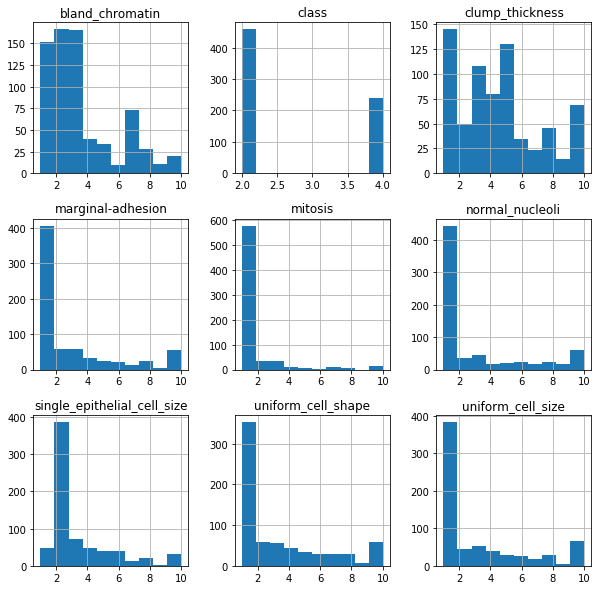

In [6]:
# plot histograms for each variable
df.hist(figsize = (10,10))
plt.show()        #using matplotlib.pyplot

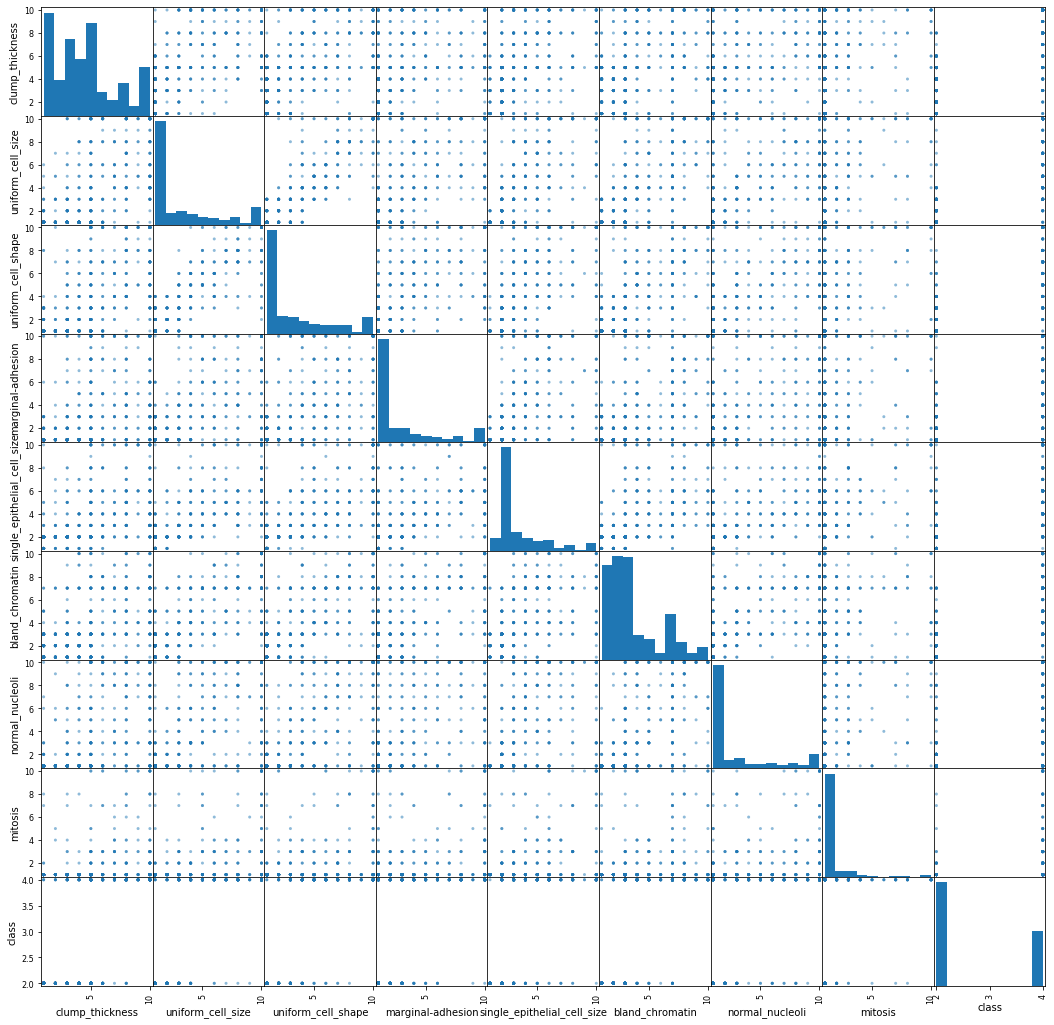

In [7]:
# Create scatter plot matrix to show the relationship between variables
scatter_matrix(df, figsize = (18,18)) #using pandas.plotting.scatter_matrix
plt.show()   #using matplotlib.pyplot.show

In [8]:
#***************
# Training
#***************

# Create X and Y data sets for training
X = np.array(df.drop(['class'], 1)) 
y = np.array(df['class'])           

#X_train, X_test, y_train, y_test = cross_validate.train_test_split(X, y, test_size = 0.2) #instructor used this
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size = 0.2) #stack overflow used this

In [9]:
#Specify testing options
seed = 8  #will use this so that everyone running this program can get same results with random num gen
scoring = 'accuracy'


In [10]:
#Define the models to train
models = [] #empty list
models.append(('KVN', KNeighborsClassifier(n_neighbors = 5))) #name the KNN, start with 5 neighbors
models.append(('SVN', SVC())) #support vector machine

# Evaluate each model in turn
results = []
names = []

for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
    
    



KVN: 0.974870 (0.023134)
SVN: 0.960552 (0.027731)


C:\Users\miked\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\miked\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\miked\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\miked\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarni